# Real Estate valuation Prediction of New Taipei City

# Steps
### Load Dataset
### Data Preprocessing
### Exploratory Data Analysis
### Model selection
### model Training
### Test the performance of the model
### check some metrics to evaluate model


## Problem Statement:

The market historical data set of real estate valuation are collected from Sindian Dist. New Taipei City , Taiwan. The real estate valuation is a regression problem. The data set was randomly split into the training dataset two-third samples and testing data set one third samples.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Real_estate.csv',index_col=None)

In [3]:
df.head()

,transaction_date,house_age,distance_to _the _nearest _MRT _station,no_of_convenience_stores,latitude,longitude,house_price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
print(df.house_price)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: house_price, Length: 414, dtype: float64


In [5]:
df.isnull().sum()

transaction_date                           0
house_age                                  0
distance_to _the _nearest _MRT _station    0
no_of_convenience_stores                   0
latitude                                   0
longitude                                  0
house_price                                0
dtype: int64

In [9]:
df_1=df.drop(['transaction_date','latitude','longitude'],axis=1)

In [10]:
df_1.columns

Index(['house_age', 'distance_to _the _nearest _MRT _station',
       'no_of_convenience_stores', 'house_price'],
      dtype='object')

In [11]:
df_1.describe()

,house_age,distance_to _the _nearest _MRT _station,no_of_convenience_stores,house_price
count,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,37.980193
std,11.392485,1262.109595,2.945562,13.606488
min,0.000000,23.382840,0.000000,7.600000
25%,9.025000,289.324800,1.000000,27.700000
50%,16.100000,492.231300,4.000000,38.450000
75%,28.150000,1454.279000,6.000000,46.600000
max,43.800000,6488.021000,10.000000,117.500000


In [12]:
df_1.corr()

,house_age,distance_to _the _nearest _MRT _station,no_of_convenience_stores,house_price
house_age,1.000000,0.025622,0.049593,-0.210567
distance_to _the _nearest _MRT _station,0.025622,1.000000,-0.602519,-0.673613
no_of_convenience_stores,0.049593,-0.602519,1.000000,0.571005
house_price,-0.210567,-0.673613,0.571005,1.000000


In [13]:
df_1.cov()

,house_age,distance_to _the _nearest _MRT _station,no_of_convenience_stores,house_price
house_age,129.788704,3.684082e+02,1.664189,-32.640356
distance_to _the _nearest _MRT _station,368.408249,1.592921e+06,-2239.938319,-11567.871845
no_of_convenience_stores,1.664189,-2.239938e+03,8.676334,22.885163
house_price,-32.640356,-1.156787e+04,22.885163,185.136507


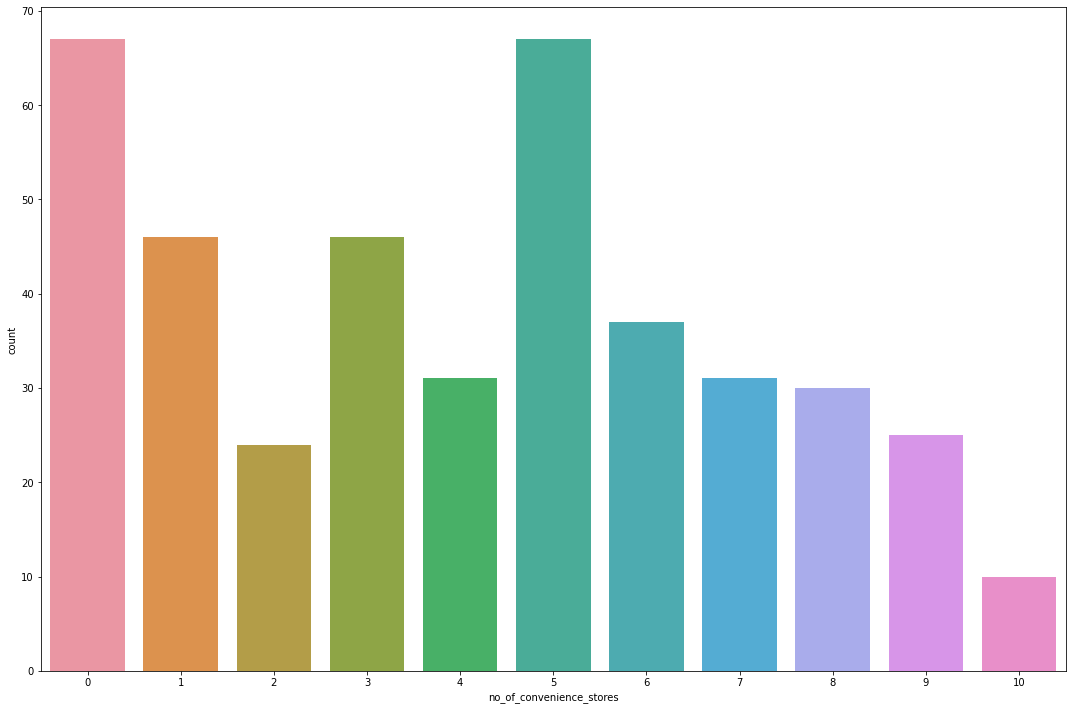

In [14]:
sns.countplot(x = 'no_of_convenience_stores', data = df_1)
plt.tight_layout(rect=(0, 0, 2.5, 2.5)) 

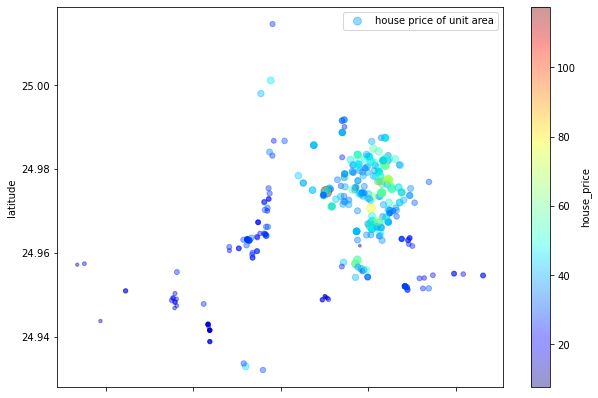

In [15]:
df.plot(kind="scatter", x="longitude", y="latitude",
    s=df["house_price"], label="house price of unit area",
    c='house_price', cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

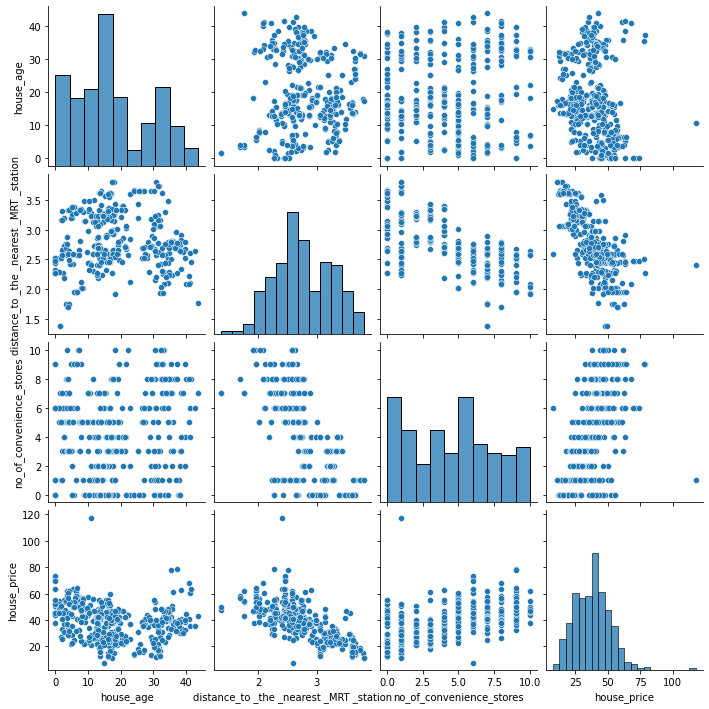

In [95]:
sns.pairplot(df_1)

In [17]:
import math

In [18]:
a=np.log10(df_1['distance_to _the _nearest _MRT _station'])
a

0      1.928799
1      2.486565
2      2.749724
3      2.749724
4      2.591697
         ...   
409    3.610875
410    1.956438
411    2.592143
412    2.020403
413    1.956438
Name: distance_to _the _nearest _MRT _station, Length: 414, dtype: float64

In [19]:
df_1['distance_to _the _nearest _MRT _station']=a

In [20]:
df_1.head()

,house_age,distance_to _the _nearest _MRT _station,no_of_convenience_stores,house_price
0,32.0,1.928799,10,37.9
1,19.5,2.486565,9,42.2
2,13.3,2.749724,5,47.3
3,13.3,2.749724,5,54.8
4,5.0,2.591697,5,43.1


C:\Users\bhave\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance_to _the _nearest _MRT _station', ylabel='Density'>

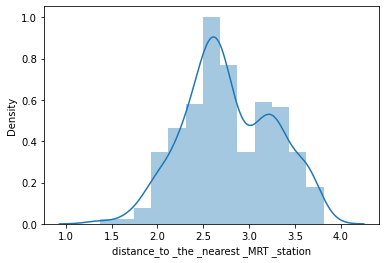

In [21]:
sns.distplot(df_1['distance_to _the _nearest _MRT _station'])

In [22]:
df_1.corr()

,house_age,distance_to _the _nearest _MRT _station,no_of_convenience_stores,house_price
house_age,1.000000,0.067322,0.049593,-0.210567
distance_to _the _nearest _MRT _station,0.067322,1.000000,-0.685516,-0.734339
no_of_convenience_stores,0.049593,-0.685516,1.000000,0.571005
house_price,-0.210567,-0.734339,0.571005,1.000000


#### The Pearson correlation coefficient also known as the product-moment correlation coefficient
#### is a measure of the linear association between two variables X and Y. It has a value between -1 and 1 where:

<AxesSubplot:>

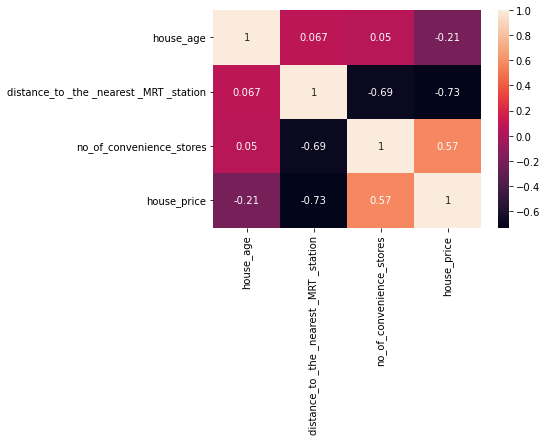

In [23]:
sns.heatmap(df_1.corr(),annot=True)

In [27]:
y=df_1['house_price']
X=df_1[['house_age','distance_to _the _nearest _MRT _station','no_of_convenience_stores']]

In [28]:
X

,house_age,distance_to _the _nearest _MRT _station,no_of_convenience_stores
0,32.0,1.928799,10
1,19.5,2.486565,9
2,13.3,2.749724,5
3,13.3,2.749724,5
4,5.0,2.591697,5
...,...,...,...
409,13.7,3.610875,0
410,5.6,1.956438,9
411,18.8,2.592143,7
412,8.1,2.020403,5


In [29]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: house_price, Length: 414, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
X_train

,house_age,distance_to _the _nearest _MRT _station,no_of_convenience_stores
159,15.5,2.911654,4
95,8.0,2.020403,5
11,6.3,1.956438,9
374,5.4,2.591697,5
165,13.7,3.092217,1
...,...,...,...
255,31.5,3.741312,1
72,32.5,2.627923,8
396,37.1,2.963143,1
235,12.9,2.399035,7


In [33]:
y_train

159    37.4
95     51.8
11     58.1
374    49.5
165    30.6
       ... 
255    17.4
72     36.3
396    31.9
235    39.3
37     25.3
Name: house_price, Length: 331, dtype: float64

In [34]:
X_test

,house_age,distance_to _the _nearest _MRT _station,no_of_convenience_stores
388,10.4,3.352556,4
102,1.1,2.286871,6
187,8.9,3.488293,0
162,16.0,3.609230,0
90,0.0,2.437773,1
...,...,...,...
322,12.9,2.272960,1
119,16.6,2.461386,5
245,7.5,2.805922,5
146,0.0,2.268179,0


In [35]:
y_test

388    27.3
102    54.4
187    22.0
162    11.6
90     45.4
       ... 
322    33.1
119    59.6
245    40.8
146    52.2
360    47.1
Name: house_price, Length: 83, dtype: float64

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train,y_train)

LinearRegression()

In [40]:
print(lm.intercept_)

63.95692363461278


In [93]:
print(lm.coef_)

[ -7.83313058 -43.16391045   6.6486809 ]


In [94]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
house_age,-7.833131
distance_to _the _nearest _MRT _station,-43.163910
no_of_convenience_stores,6.648681


In [45]:
y_pred= lm.predict(X_test)
y_pred

array([28.46769715, 55.74910654, 22.98284577, 18.95677663, 49.18220209,
       29.05235355, 26.73110705, 34.50980382, 43.57010305, 16.03907176,
       16.82788068, 43.81928905, 31.2920191 , 56.29011633, 64.41631482,
       28.7359367 , 49.18220209, 42.47200885, 26.92682189, 48.4599839 ,
       63.72861446, 25.73010736, 41.56159839, 52.21645539, 45.63443989,
       29.71436444, 28.73694553, 59.83399942, 47.43934422, 18.79410851,
       30.10364736, 34.84991611, 39.05362339, 59.90553486, 54.40967545,
       19.07272115, 41.47888159, 41.43592707, 30.73126428, 18.90312506,
       38.86393817, 28.64670853, 64.2911278 , 29.41800057, 29.34693677,
       32.43909785, 28.37802685, 41.1870386 , 45.78059778, 34.68361841,
       19.09060501, 54.53365297, 54.18090682, 19.3306243 , 52.39555892,
       49.4566767 , 49.18220209, 37.51906796, 44.45795216, 43.73661877,
       28.53901821, 51.62866476, 29.30899541, 19.07272115, 42.01661719,
       45.46055768, 60.77786969, 47.89124518, 19.34850816, 41.30

In [92]:
Data1 = pd.DataFrame(y_pred,y_test).reset_index()
Data1.columns = ['Actual','Predicted' ]
Data1

,Actual,Predicted
0,27.3,28.467697
1,54.4,55.749107
2,22.0,22.982846
3,11.6,18.956777
4,45.4,49.182202
...,...,...
78,33.1,50.631506
79,59.6,48.334797
80,40.8,42.109764
81,52.2,52.382626


In [74]:
from sklearn import metrics

In [75]:
residuals=y_test-y_pred

(array([ 7.,  4.,  4.,  6., 16., 16., 20.,  6.,  1.,  3.]),
 array([-20.57529137, -17.36088866, -14.14648595, -10.93208324,
         -7.71768053,  -4.50327782,  -1.28887511,   1.9255276 ,
          5.1399303 ,   8.35433301,  11.56873572]),
 <BarContainer object of 10 artists>)

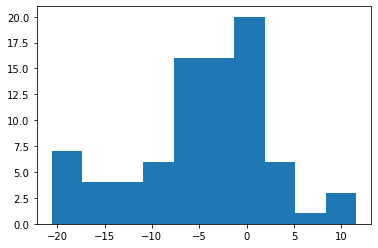

In [76]:
plt.hist(residuals,bins=10)

C:\Users\bhave\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='house_price', ylabel='Density'>

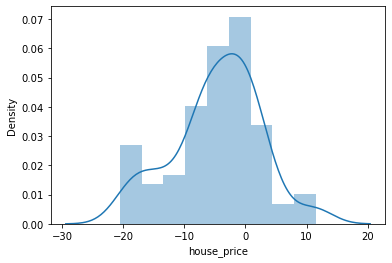

In [77]:
sns.distplot(residuals)

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 6.39014330882536
MSE: 72.06026292509071
RMSE: 8.488831658425717


## R square and adjusted R square

In [79]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.5252510923105722


# Least Square Estimator Approach

In [80]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            house_price   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              777.8
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                   1.05e-148
Time:                        23:15:41   Log-Likelihood:                         -1353.2
No. Observations:                 331   AIC:                                      2712.
Df Residuals:                     328   BIC:                                      2724.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.0758      2.971     -0.699      0.485      -7.921       3.769
x2            29.3732      2.300     12.770      0.000      24.848      33.898
x3            49.4710      2.212     22.365      0.000      45.120      53.822
==============================================================================
Omnibus:                      110.586   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.708
Skew:                           1.286   Prob(JB):                    1.97e-129
Kurtosis:                       9.030   Cond. No.                         3.71
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
prediction=model.predict(X_test)
prediction

array([43.99015161, 37.79671858, 26.37806676, 27.91726126, 15.45379147,
       32.06610068, 38.45343754, 39.42192808, 16.27990126, 32.88428824,
       32.88859804, 40.89294314, 18.55926025, 26.39273829, 47.28564744,
       37.10605377, 15.45379147, 34.22344244, 38.48934572, 34.85487156,
       51.05642539, 44.12834422, 52.24766247, 39.60887446, 38.26567961,
       25.65804829, 38.96538754, 28.36610365, 37.39253117, 27.90959251,
       38.89771557, 29.49597889, 29.89883265, 28.38506066, 46.78490396,
       28.24418325, 37.79624177, 31.5973722 , 21.0714244 , 27.90304351,
       49.03897798, 18.63465656, 47.25247269, 39.02611492, 32.11927498,
       36.83497427, 32.47425435, 33.50839696, 40.30227433, 23.98977867,
       28.2489225 , 42.82831283, 50.02355681, 28.05177004, 56.46345788,
       53.136955  , 15.45379147, 26.55811332, 16.19990461, 38.57641504,
       18.69103089, 11.64148777, 36.39480924, 28.24418325, 17.96269659,
       54.46976633, 32.55391424, 51.27144464, 28.05650929, 17.88

In [83]:
data=pd.DataFrame(prediction,y_test).reset_index()
data.columns = ['Actual','Predicted']
data

,Actual,Predicted
0,27.3,43.990152
1,54.4,37.796719
2,22.0,26.378067
3,11.6,27.917261
4,45.4,15.453791
...,...,...
78,33.1,12.286239
79,59.6,34.821697
80,40.8,40.596596
81,52.2,7.876347


In [88]:
residuals1=y_test-prediction

C:\Users\bhave\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='house_price', ylabel='Density'>

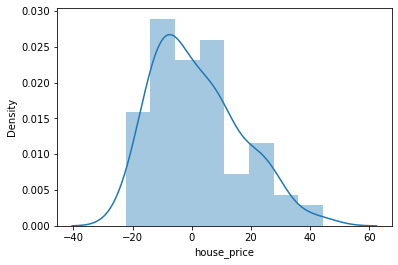

In [89]:
sns.distplot(residuals1)